In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 导入数据，观察数据

In [2]:
df = pd.read_csv('./data/ma_resp_data_temp.csv',header=0)
pd.set_option('max_columns',100)  # 显示100列数据
df.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.0,88,NaN,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.0,96,NaN,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.0,88,NaN,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,NaN,37,4,3


In [3]:
df.shape

(43666, 76)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 76 columns):
KBM_INDV_ID    43666 non-null int64
resp_flag      43666 non-null int64
GEND           43666 non-null object
CA00           43666 non-null int64
CA03           43666 non-null int64
CA06           43666 non-null int64
CA11           43666 non-null int64
CA16           43666 non-null int64
AART           43666 non-null object
ADBT           43666 non-null object
ADEP           43666 non-null object
AHBP           43666 non-null object
AHCH           43666 non-null object
ARES           43666 non-null object
AHRT           43666 non-null object
AASN           43656 non-null object
ADGS           43666 non-null object
AHRL           43666 non-null object
ASKN           43658 non-null object
AVIS           43666 non-null object
BANK           43666 non-null object
COLLEGE        43658 non-null object
FINI           43666 non-null object
INLI           43666 non-null object
INMEDI    

In [6]:
#将ID转化为object
df['KBM_INDV_ID'] = df['KBM_INDV_ID'].astype('object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resp_flag,43666.0,0.400518,0.490009,0.0,0.0,0.0,1.0,1.0
CA00,43666.0,0.267806,0.996459,0.0,0.0,0.0,0.0,6.0
CA03,43666.0,0.214034,0.886914,0.0,0.0,0.0,0.0,7.0
CA06,43666.0,0.381968,1.178281,0.0,0.0,0.0,0.0,7.0
CA11,43666.0,0.313196,1.047293,0.0,0.0,0.0,0.0,7.0
CA16,43666.0,0.224316,0.858203,0.0,0.0,0.0,0.0,7.0
LIVEWELL,43661.0,2.842125,1.172255,1.0,2.0,3.0,4.0,6.0
NOC19,43666.0,0.465717,1.045087,0.0,0.0,0.0,0.0,9.0
NAH19,43666.0,2.080818,1.215852,0.0,1.0,2.0,3.0,9.0
NPH19,43666.0,2.546535,1.903632,0.0,1.0,2.0,3.0,16.0


In [8]:
#检查缺失列的数量
len(df.columns)-df.dropna(axis=1).shape[1]

20

In [9]:
#统计各列中空值的数量
NA = df.isnull().sum()

In [10]:
#重置索引
NA = NA.reset_index()
NA.head()

,index,0
0,KBM_INDV_ID,0
1,resp_flag,0
2,GEND,0
3,CA00,0
4,CA03,0


In [11]:
#重置列名
NA.columns = ['Var','NA_count']
NA.head()

,Var,NA_count
0,KBM_INDV_ID,0
1,resp_flag,0
2,GEND,0
3,CA00,0
4,CA03,0


In [12]:
#过滤出大于0的数据
NA = NA[NA.NA_count>0].reset_index(drop=True)#重置索引，并把之前的索引删除
NA.head()

,Var,NA_count
0,AASN,10
1,ASKN,8
2,COLLEGE,8
3,MOBPLUS,7
4,N2NCY,10


In [13]:
#把空值个数换化为比例
NA.NA_count/df.shape[0]

0     0.000229
1     0.000183
2     0.000183
3     0.000160
4     0.000229
5     0.000206
6     0.000183
7     0.000115
8     0.000229
9     0.000252
10    0.000092
11    0.000115
12    0.000046
13    0.000160
14    0.000344
15    0.000344
16    0.000527
17    0.000321
18    0.000137
19    0.000344
Name: NA_count, dtype: float64

In [15]:
#查看数据中是否有重复值
df[df.duplicated()]

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19


## 探索数据及数据可视化分析

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [17]:
#支持中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 探索样本分类是否均衡

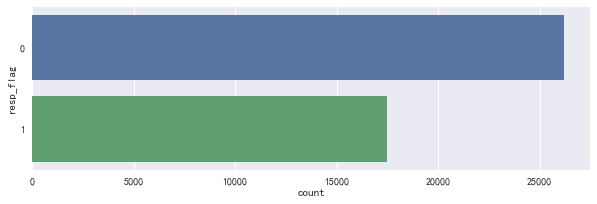

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(y='resp_flag',data=df)
plt.show()

In [19]:
#计算购买用户和未购买的比例
df.resp_flag.sum()/df.resp_flag.shape[0]

0.4005175651536665

In [20]:
1-df.resp_flag.sum()/df.resp_flag.shape[0]

0.5994824348463335

### 用户年龄分布情况

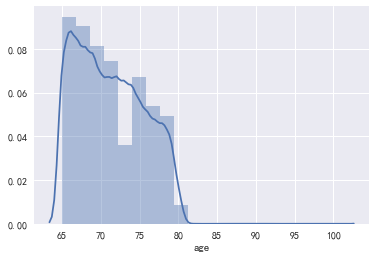

In [21]:
sns.distplot(df['age'],bins=20)#分成20个区间段

### 探索用户年龄和购买商业医疗保险之间的关系

Text(0, 0.5, 'Density')

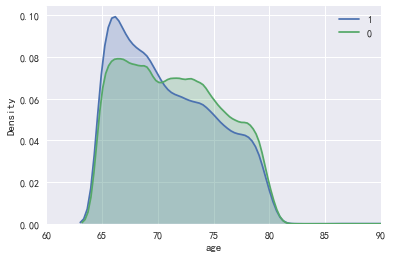

In [22]:
#两类样本的年龄分布  核密度估计kdeplot 直观的看到数据样本本身的分布特征
sns.kdeplot(df.age[df.resp_flag==1],label='1',shade=True)
sns.kdeplot(df.age[df.resp_flag==0],label='0',shade=True)
plt.xlim([60,90])
plt.xlabel('age')
plt.ylabel('Density')

### 探索用户性别以及性别和购买保险之间的关系

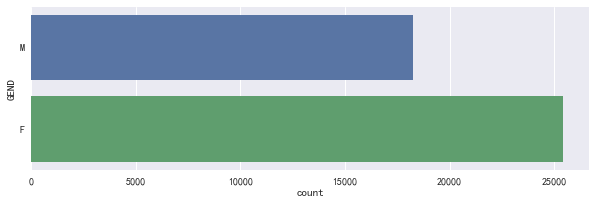

In [23]:
# 查看性别比例
plt.figure(figsize=(10,3))
sns.countplot(y = 'GEND',data=df)
plt.show()

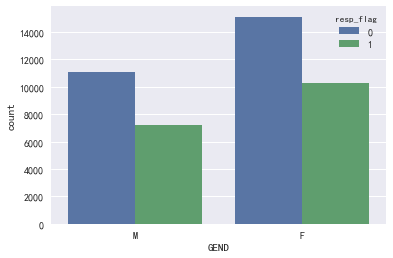

In [26]:
sns.countplot('GEND',hue='resp_flag',data=df)

### 探索用户的学历情况，以及学历与购买保险之间的关系

In [27]:
df.c210mys.value_counts()

4    18597
3    12437
6     7493
5     4474
2      462
7      130
0       60
1        9
8        4
Name: c210mys, dtype: int64

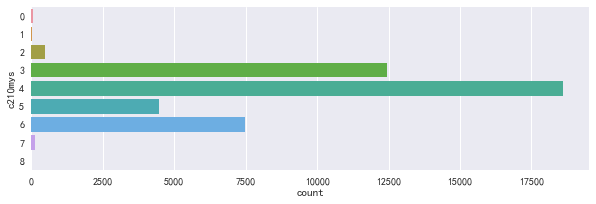

In [28]:
plt.figure(figsize=(10,3))
sns.countplot(y = 'c210mys',data=df)
plt.show()

Text(0, 0.5, '购买数量')

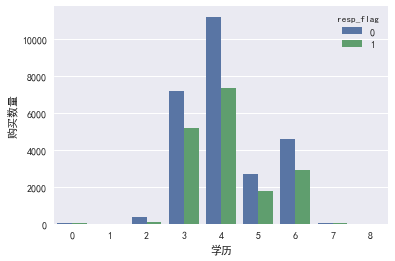

In [29]:
#不同学历情况下，购买保险的情况
sns.countplot(x='c210mys',hue='resp_flag',data=df)
plt.xlabel('学历')
plt.ylabel('购买数量')

Text(0, 0.5, '购买数量')

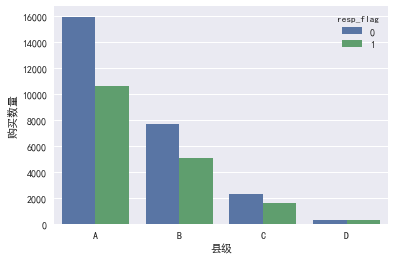

In [30]:
#不同的县级别，购买保险的情况
sns.countplot(x='N2NCY',hue='resp_flag',data=df)
plt.xlabel('县级')
plt.ylabel('购买数量')

## 数据预处理

### 空值填充

In [31]:
#统计每一列数据类型
temp = []
for i in NA.Var:
    temp.append(df[i].dtypes)    

In [32]:
NA['数据类型']=temp
NA.head()

,Var,NA_count,数据类型
0,AASN,10,object
1,ASKN,8,object
2,COLLEGE,8,object
3,MOBPLUS,7,object
4,N2NCY,10,object


In [33]:
#填充策略

#分类变量：通常分类水平出现的次数多，出现的概率就是最高的，用众数填充

#数值变量：幸福指数  收入所处排名 都是分类变量

In [34]:
#去掉年龄变量
NA[NA.Var != 'age'].Var

0         AASN
1         ASKN
2      COLLEGE
3      MOBPLUS
4        N2NCY
5        NY8Y9
6         POEP
7     LIVEWELL
8      HOMSTAT
9       HINSUB
11    c210b200
12     c210cip
13     c210hmi
14     c210hva
15     c210mah
16     c210psu
17     c210wht
18        ilor
19        meda
Name: Var, dtype: object

In [35]:
#对列名进行遍历，依次进行众数填充
for i in NA[NA.Var != 'age'].Var:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [36]:
#年龄采取均值填补
df.age.fillna(df.age.mean(),inplace=True)

In [37]:
df.isnull().sum()

KBM_INDV_ID    0
resp_flag      0
GEND           0
CA00           0
CA03           0
CA06           0
CA11           0
CA16           0
AART           0
ADBT           0
ADEP           0
AHBP           0
AHCH           0
ARES           0
AHRT           0
AASN           0
ADGS           0
AHRL           0
ASKN           0
AVIS           0
BANK           0
COLLEGE        0
FINI           0
INLI           0
INMEDI         0
INVE           0
IOLP           0
MOBPLUS        0
N2NCY          0
NY8Y9          0
              ..
NAH19          0
NPH19          0
POC19          0
HOMSTAT        0
HINSUB         0
STATE_NAME     0
age            0
c210apvt       0
c210b200       0
c210blu        0
c210bpvt       0
c210cip        0
c210ebi        0
c210hmi        0
c210hva        0
c210kses       0
c210mah        0
c210mob        0
c210mys        0
c210pdv        0
c210pmr        0
c210poo        0
c210psu        0
c210pwc        0
c210wht        0
ilor           0
meda           0
pdpe          

### 变量编码

In [38]:
#把无效特征用户ID删掉
del df['KBM_INDV_ID']

In [39]:
df.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.0,88,4.0,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.0,96,4.0,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.0,88,4.0,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,61.0,37,4,3


In [40]:
#把类型object的提取出来，数值化
df_object = df.select_dtypes('object')
df_object.head()

,GEND,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,POC19,HOMSTAT,HINSUB,STATE_NAME
0,M,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,Y,Y,C,CA
1,M,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,U,Y,U,CA
2,F,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,U,Y,U,CA
3,F,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,Y,Y,C,CA
4,F,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,U,U,A,CA


In [41]:
from sklearn.preprocessing import OrdinalEncoder  #对二维特征数值型编码
df_object = OrdinalEncoder().fit_transform(df_object)
df_object

array([[1., 0., 0., ..., 4., 2., 0.],
       [1., 0., 0., ..., 4., 3., 0.],
       [0., 0., 0., ..., 4., 3., 0.],
       ...,
       [1., 0., 0., ..., 4., 3., 0.],
       [1., 0., 0., ..., 4., 2., 4.],
       [1., 0., 0., ..., 0., 1., 5.]])

In [42]:
#进行数据编码转换
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OrdinalEncoder().fit_transform(df[[i]])
        
df.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,1.0,4,0,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,3,8,2.0,4.0,2.0,0.0,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,1,1,1.0,4.0,3.0,0.0,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,1,1,1.0,4.0,3.0,0.0,67.0,88,4.0,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,0.0,0,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4,5,2.0,4.0,2.0,0.0,71.0,96,4.0,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0,1,1,1.0,3.0,0.0,0.0,75.0,88,4.0,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,61.0,37,4,3


## 数据建模

In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [44]:
#确定特征矩阵和标签
X = df.iloc[:,1:]
y = df['resp_flag']

In [45]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,
                                          random_state=420)

In [46]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.5946564885496183

### 网格搜索

In [47]:
#尝试使用最小叶节点样本数量和最小分割样本数量进行调参
param_grid = {'min_samples_leaf':list(range(1000,6000,100)),
             'min_samples_split':list(range(4000,6000,100))}
GR = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,cv=5)
GR.fit(Xtrain,Ytrain)

GR.best_params_

{'min_samples_leaf': 1500, 'min_samples_split': 4000}

In [48]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,
                                 min_samples_leaf=1500,
                                 min_samples_split=4000)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)
#模型能力提高了

0.6417557251908397

In [49]:
import graphviz
features = list(df.columns[1:])

dot_data = tree.export_graphviz(clf,feature_names=features,
                               class_names=['NP','P'],filled=True,rounded=True)

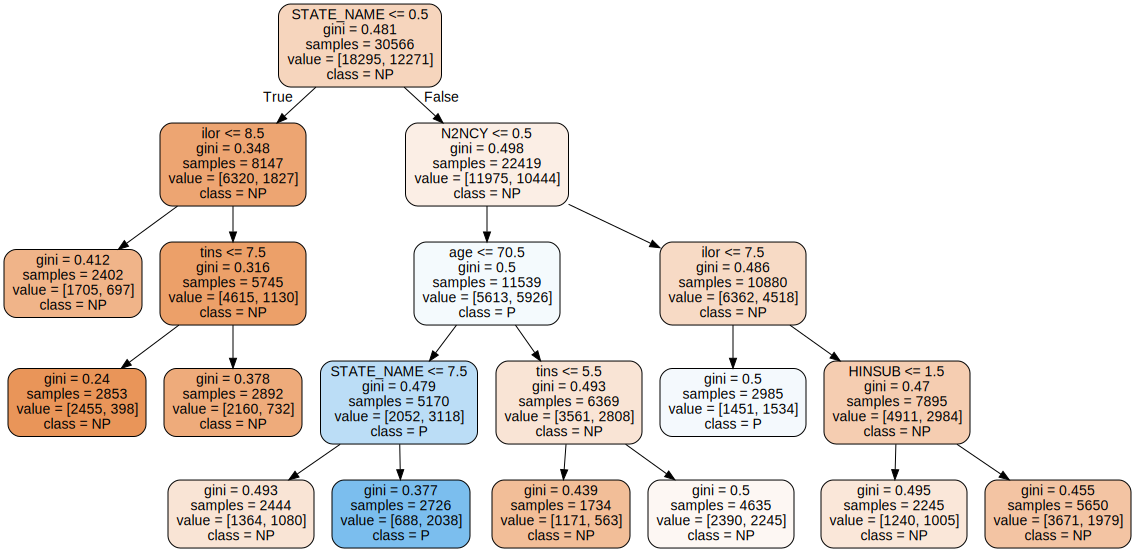

In [50]:
graph = graphviz.Source(dot_data)
graph

### 对数据进行PCA压缩

In [51]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=20)

In [52]:
Xtrain.shape

(30566, 74)

In [53]:
Xtrain_pca = pca.fit_transform(Xtrain)
Xtrain_pca.shape

(30566, 20)

In [54]:
#累计方差
list(pca.explained_variance_ratio_)

[0.9153591782418453,
 0.04623390351316754,
 0.009614205126099036,
 0.0059733295547924215,
 0.005376298245309462,
 0.0038206947441833477,
 0.0032810657682490097,
 0.002282561885296771,
 0.0016778924397305934,
 0.0010966357436341806,
 0.0009433417755888605,
 0.0009092016983611149,
 0.0007054275771638145,
 0.0004457010640798597,
 0.0003960043714565213,
 0.00030893456867792167,
 0.0002769756111792194,
 0.00022580708084060145,
 0.00021132827352552525,
 0.00017942417200120434]

In [55]:
(pca.explained_variance_ratio_).sum()
#主成分分析效果还可以，有一个元素累计方差0.91

0.9993179114551825

In [56]:
Xtest_pca = pca.transform(Xtest)

In [57]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,
                                 min_samples_leaf=1500,
                                 min_samples_split=4000)
clf.fit(Xtrain_pca,Ytrain)
clf.score(Xtest_pca,Ytest)#降低了，模型信息损失了

0.6115267175572519